# 1.Data  Preparation

In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [2]:
url = 'https://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None
data_root = './data' # Change me to store data elsewhere

def download_progress_hook(count, blockSize, totalSize):
    """A hook to report the progress of a download. This is mostly intended for users with
    slow internet connections. Reports every 5% change in download progress.
    """
    global last_percent_reported
    percent = int(count * blockSize * 100 / totalSize)

    if last_percent_reported != percent:
        if percent % 5 == 0:
            sys.stdout.write("%s%%" % percent)
            sys.stdout.flush()
        else:
            sys.stdout.write(".")
            sys.stdout.flush()
      
    last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
    """Download a file if not present, and make sure it's the right size."""
    dest_filename = os.path.join(data_root, filename)
    if force or not os.path.exists(dest_filename):
        print('Attempting to download:', filename) 
        filename, _ = urlretrieve(url + filename, dest_filename, reporthook=download_progress_hook)
        print('\nDownload Complete!')
        statinfo = os.stat(dest_filename)
        if statinfo.st_size == expected_bytes:
            print('Found and verified', dest_filename)
        else:
            raise Exception('Failed to verify ' + dest_filename + '. Can you get to it with a browser?')
    return dest_filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

In [3]:
train_filename = 'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_large.tar.gz'
test_filename = 'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_small.tar.gz'

In [4]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
    root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
    if os.path.isdir(root) and not force:
        # You may override by setting force=True.
        print('%s already present - Skipping extraction of %s.' % (root, filename))
    else:
        print('Extracting data for %s. This may take a while. Please wait.' % root)
        tar = tarfile.open(filename)
        sys.stdout.flush()
        tar.extractall(data_root)
        tar.close()
    data_folders = [os.path.join(root, d) for d in sorted(os.listdir(root)) if os.path.isdir(os.path.join(root, d))]
    if len(data_folders) != num_classes:
        raise Exception('Expected %d folders, one per class. Found %d instead.' % (num_classes, len(data_folders)))
    print(data_folders)
    return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

F:\NLP_CV\lec\9lesson\data\notMNIST_large already present - Skipping extraction of F:\NLP_CV\lec\9lesson\data\notMNIST_large.tar.gz.
['F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_large\\A', 'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_large\\B', 'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_large\\C', 'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_large\\D', 'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_large\\E', 'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_large\\F', 'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_large\\G', 'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_large\\H', 'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_large\\I', 'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_large\\J']
F:\NLP_CV\lec\9lesson\data\notMNIST_small already present - Skipping extraction of F:\NLP_CV\lec\9lesson\data\notMNIST_small.tar.gz.
['F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_small\\A', 'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_small\\B', 'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_small\\C', 'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_s

---
Problem 1
---------

Let's take a peek at some of the data to make sure it looks sensible. Each exemplar should be an image of a character A through J rendered in a different font. Display a sample of the images that we just downloaded. Hint: you can use the package IPython.display.

---

In [5]:
import random

In [6]:
def show_samples(n = 10):
    train_smps_dir = random.choice(train_folders)
    test_smps_dir = random.choice(test_folders)
    #print('{} files: {}'.format(train_smps_dir,len(os.listdir(train_smps_dir))))
    train_smps_fnames = random.sample(list(os.listdir(train_smps_dir)),n)
    test_smps_fnames = random.sample(list(os.listdir(test_smps_dir)),n)
    train_smps_path = [os.path.join(train_smps_dir,fn) for fn in train_smps_fnames]
    #print(train_smps_fnames)
    test_smps_path = [os.path.join(test_smps_dir,fn) for fn in test_smps_fnames]
    #print(train_smps_path)
    #print('TrainSets samples {} pictures:'.format(n))
    #for fp in train_smps_path:
    #    Image(fp)
    ##print('TestSets samples {} pictures:'.format(n))   
    #for fp in test_smps_path:
    #    Image(fp)
    return train_smps_path,test_smps_path

In [7]:
train_smps_path ,test_smps_path = show_samples(n = 5)

In [8]:
import matplotlib.image as mpimg

Trainsets 5 samples:


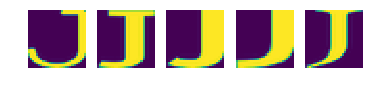

In [9]:
print('Trainsets {} samples:'.format(len(train_smps_path)))
plt.figure()
for i,fp in enumerate(train_smps_path):
    img = mpimg.imread(fp)
    plt.subplot(1,len(train_smps_path),i+1)
    plt.axis('off')
    plt.imshow(img)
plt.show()

Testsets 5 samples:


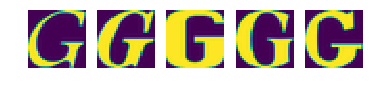

In [10]:
print('Testsets {} samples:'.format(len(test_smps_path)))
plt.figure()
for i,fp in enumerate(test_smps_path):
    img = mpimg.imread(fp)
    plt.subplot(1,len(test_smps_path),i+1)
    plt.axis('off')
    plt.imshow(img)
plt.show()

In [11]:
imageio.imread?

In [12]:
pickle.dump?

In [13]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
    """Load the data for a single letter label."""
    image_files = os.listdir(folder)
    dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
    print(folder)
    num_images = 0
    for image in image_files:
        image_file = os.path.join(folder, image)
        try:
            image_data = (imageio.imread(image_file).astype(float) - pixel_depth / 2) / pixel_depth
            if image_data.shape != (image_size, image_size):
                raise Exception('Unexpected image shape: %s' % str(image_data.shape))
            dataset[num_images, :, :] = image_data
            num_images = num_images + 1
        except (IOError, ValueError) as e:
            print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    dataset = dataset[0:num_images, :, :]
    if num_images < min_num_images:
        raise Exception('Many fewer images than expected: %d < %d' %(num_images, min_num_images))
    
    print('Full dataset tensor:', dataset.shape)
    print('Mean:', np.mean(dataset))
    print('Standard deviation:', np.std(dataset))
    return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
    dataset_names = []
    for folder in data_folders:
        set_filename = folder + '.pickle'
        dataset_names.append(set_filename)
        if os.path.exists(set_filename) and not force:
            # You may override by setting force=True.
            print('%s already present - Skipping pickling.' % set_filename)
        else:
            print('Pickling %s.' % set_filename)
            dataset = load_letter(folder, min_num_images_per_class)
            try:
                with open(set_filename, 'wb') as f:
                    pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
            except Exception as e:
                print('Unable to save data to', set_filename, ':', e)
  
    return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

F:\NLP_CV\lec\9lesson\data\notMNIST_large\A.pickle already present - Skipping pickling.
F:\NLP_CV\lec\9lesson\data\notMNIST_large\B.pickle already present - Skipping pickling.
F:\NLP_CV\lec\9lesson\data\notMNIST_large\C.pickle already present - Skipping pickling.
F:\NLP_CV\lec\9lesson\data\notMNIST_large\D.pickle already present - Skipping pickling.
F:\NLP_CV\lec\9lesson\data\notMNIST_large\E.pickle already present - Skipping pickling.
F:\NLP_CV\lec\9lesson\data\notMNIST_large\F.pickle already present - Skipping pickling.
F:\NLP_CV\lec\9lesson\data\notMNIST_large\G.pickle already present - Skipping pickling.
F:\NLP_CV\lec\9lesson\data\notMNIST_large\H.pickle already present - Skipping pickling.
F:\NLP_CV\lec\9lesson\data\notMNIST_large\I.pickle already present - Skipping pickling.
F:\NLP_CV\lec\9lesson\data\notMNIST_large\J.pickle already present - Skipping pickling.
F:\NLP_CV\lec\9lesson\data\notMNIST_small\A.pickle already present - Skipping pickling.
F:\NLP_CV\lec\9lesson\data\notMN

---
Problem 2
---------

Let's verify that the data still looks good. Displaying a sample of the labels and images from the ndarray. Hint: you can use matplotlib.pyplot.

---

In [59]:
train_datasets[0]

'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_large\\A.pickle'

In [60]:
samples = None
with open(train_datasets[0],'rb') as f:
    samples = pickle.load(f)

In [71]:
samples[0].shape

(28, 28)

label:  A


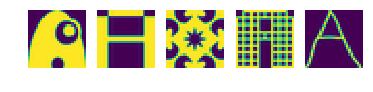

In [78]:
plt.figure()
i = 0
print('label: ',train_datasets[0].split('\\')[-1].split('.')[0])
for s in samples[5:10]:
    i += 1
    plt.subplot(1,5,i)
    plt.imshow(s)
    plt.axis('off')
plt.show()

---
Problem 3
---------
Another check: we expect the data to be balanced across classes. Verify that.

---

In [80]:
def balance_detect():
    for p in train_datasets:
        data = None
        label = p.split('\\')[-1].split('.')[0]
        with open(p,'rb') as f:
            data = pickle.load(f)
        print('label: {},length: {}'.format(label,len(data)))

In [81]:
balance_detect()

label: A,length: 52909
label: B,length: 52911
label: C,length: 52912
label: D,length: 52911
label: E,length: 52912
label: F,length: 52912
label: G,length: 52912
label: H,length: 52912
label: I,length: 52912
label: J,length: 52911


In [14]:
def make_arrays(nb_rows, img_size):
    if nb_rows:
        dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
        labels = np.ndarray(nb_rows, dtype=np.int32)
    else:
        dataset, labels = None, None
    return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
    num_classes = len(pickle_files)
    print(valid_size,num_classes)
    valid_dataset, valid_labels = make_arrays(valid_size, image_size)
    train_dataset, train_labels = make_arrays(train_size, image_size)
    vsize_per_class = valid_size // num_classes
    tsize_per_class = train_size // num_classes
    
    start_v, start_t = 0, 0
    end_v, end_t = vsize_per_class, tsize_per_class
    end_l = vsize_per_class+tsize_per_class
    for label, pickle_file in enumerate(pickle_files):       
        try:
            with open(pickle_file, 'rb') as f:
                letter_set = pickle.load(f)
                # let's shuffle the letters to have random validation and training set
                np.random.shuffle(letter_set)
            if valid_dataset is not None:
                valid_letter = letter_set[:vsize_per_class, :, :]
                valid_dataset[start_v:end_v, :, :] = valid_letter
                valid_labels[start_v:end_v] = label
                start_v += vsize_per_class
                end_v += vsize_per_class
                    
            train_letter = letter_set[vsize_per_class:end_l, :, :]
            train_dataset[start_t:end_t, :, :] = train_letter
            train_labels[start_t:end_t] = label
            start_t += tsize_per_class
            end_t += tsize_per_class
        except Exception as e:
            print('Unable to process data from', pickle_file, ':', e)
            raise
    
    return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

10000 10
0 10
Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


In [15]:
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation,:,:]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

---
Problem 4
---------
Convince yourself that the data is still good after shuffling!

---

In [95]:
train_datasets

['F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_large\\A.pickle',
 'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_large\\B.pickle',
 'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_large\\C.pickle',
 'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_large\\D.pickle',
 'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_large\\E.pickle',
 'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_large\\F.pickle',
 'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_large\\G.pickle',
 'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_large\\H.pickle',
 'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_large\\I.pickle',
 'F:\\NLP_CV\\lec\\9lesson\\data\\notMNIST_large\\J.pickle']

In [193]:
def shuffle_perfect(target = 'Train'):
    labels = None
    files = None
    dataset = None
    if target == 'Train':
        print('Start detecting shuffled training datasets - - - - - -')
        dataset = train_dataset
        files = train_datasets
        labels = train_labels
    elif target == 'Validation':
        print('Start detecting shuffled validation datasets - - - - - -')
        dataset = valid_dataset
        files = train_datasets
        labels = valid_labels
    elif target == 'Test':
        print('Start detecting shuffled testing datasets - - - - - -')  
        dataset = test_dataset
        files = test_datasets
        labels = test_labels
    sort_idx = np.argsort(labels)
    total_len = len(labels)
    seg = total_len//10
    limit = 0
    data = None
    N = 0
    for i,l in enumerate(sort_idx):
        
        if i%seg == 0:
            
            with open(files[i//seg],'rb') as f:
                data = pickle.load(f)
        if dataset[l] in data:
            N += 1
            letter = files[i//seg].split('\\')[-1].split('.')[0]
            print('\r label: {}, letter: {}, volume: {}/{}'.format(i//seg,letter,N,seg),end='')
        if (i+1)%seg == 0:
            letter = files[i//seg].split('\\')[-1].split('.')[0]
            if N == seg:
                print('label: {}, letter: {}, volume: {}/{} - - - - Finish detected,Shuffle Perfectly!!!'.format(l,letter,N,seg))
            else:
                print('label: {}, letter: {}, volume: {}/{} - - - - Shuffle Defeated!!!'.format(l,letter,N,seg))
            N = 0
        
        

In [194]:
shuffle_perfect(target = 'Train')

Start detecting shuffled training datasets - - - - - -
 label: 0, letter: A, volume: 20000/20000label: 98204, letter: A, volume: 20000/20000 - - - - Finish detected,Shuffle Perfectly!!!
 label: 1, letter: B, volume: 20000/20000label: 95542, letter: B, volume: 20000/20000 - - - - Finish detected,Shuffle Perfectly!!!
 label: 2, letter: C, volume: 20000/20000label: 187730, letter: C, volume: 20000/20000 - - - - Finish detected,Shuffle Perfectly!!!
 label: 3, letter: D, volume: 20000/20000label: 100852, letter: D, volume: 20000/20000 - - - - Finish detected,Shuffle Perfectly!!!
 label: 4, letter: E, volume: 20000/20000label: 79163, letter: E, volume: 20000/20000 - - - - Finish detected,Shuffle Perfectly!!!
 label: 5, letter: F, volume: 20000/20000label: 101302, letter: F, volume: 20000/20000 - - - - Finish detected,Shuffle Perfectly!!!
 label: 6, letter: G, volume: 20000/20000label: 12968, letter: G, volume: 20000/20000 - - - - Finish detected,Shuffle Perfectly!!!
 label: 7, letter: H, vol

In [19]:
pickle_file = os.path.join(data_root, 'notMNIST.pickle')

try:
    f = open(pickle_file, 'wb')
    save = {
        'train_dataset': train_dataset,
        'train_labels': train_labels,
        'valid_dataset': valid_dataset,
        'valid_labels': valid_labels,
        'test_dataset': test_dataset,
        'test_labels': test_labels,
        }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise

In [24]:
dataset['test_dataset'].shape

(10000, 28, 28)

---
Problem 5
---------

By construction, this dataset might contain a lot of overlapping samples, including training data that's also contained in the validation and test set! Overlap between training and test can skew the results if you expect to use your model in an environment where there is never an overlap, but are actually ok if you expect to see training samples recur when you use it.
Measure how much overlap there is between training, validation and test samples.

Optional questions:
- What about near duplicates between datasets? (images that are almost identical)
- Create a sanitized validation and test set, and compare your accuracy on those in subsequent assignments.
---

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
np.intersect1d?

In [189]:
def get_golden():

    train_dataset_golden = train_dataset
    train_labels_golden = train_labels
    valid_dataset_golden = None
    valid_labels_golden = None
    test_dataset_golden = None
    test_labels_golden = None
    
    def cut_loop(host,guest,bill,info):
        pure_data = []
        pure_labels = []
        N = 0
        for i,v in enumerate(guest):
            if not np.equal(v,host).all(axis=1).all(axis=1).any():
                pure_data += [v]
                pure_labels += [bill[i]]
                N += 1
            print('\r{}: volume: {}/{}  Golden: {}'.format(info,i+1,len(guest),N),end='')
        print()
        print('{}: overlapped: {}'.format(info,len(guest)-N))
        print('Pure {} datasets shape: {}'.format(info.split('-')[1],np.stack(pure_data).shape))
        print('{} Finished!!'.format(info))
        return np.stack(pure_data),np.stack(pure_labels)
    
    quene = [[train_dataset,valid_dataset,valid_labels,'Training-Validation'],
             [train_dataset,test_dataset,test_labels,'Training-Testing'],
             [valid_dataset,test_dataset,test_labels,'Validation-Testing']]
    i = 0
    for host,guest,bill,info in quene:
        print('STEP {} Processing : {} - - - - - -'.format(i+1,info))
        if i == 0:
            valid_dataset_golden ,valid_labels_golden = cut_loop(host,guest,bill,info)
        elif i == 1:
            test_dataset_golden, test_labels_golden = cut_loop(host,guest,bill,info)
            quene[2] = [valid_dataset_golden,test_dataset_golden,test_labels_golden] + [quene[2][3]]
        elif i == 2:
            test_dataset_golden, test_labels_golden = cut_loop(host,guest,bill,info)
        i += 1    
        
    save = {
        'train_dataset_golden': train_dataset_golden,
        'train_labels_golden': train_labels_golden,
        'valid_dataset_golden': valid_dataset_golden,
        'valid_labels_golden': valid_labels_golden,
        'test_dataset_golden': test_dataset_golden,
        'test_labels_golden': test_labels_golden,
        }
    pickle_file = os.path.join(data_root, 'notMNIST_Golden.pickle')
    
    try:
        f = open(pickle_file, 'wb')
        pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
        f.close()
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise
    print('Got the Golden datasets!!!')

In [190]:
get_golden()

STEP 1 Processing : Training-Validation - - - - - -
Training-Validation: volume: 10000/10000  Golden: 8933
Training-Validation: overlapped: 1067
Pure Validation datasets shape: (8933, 28, 28)
Training-Validation Finished!!
STEP 2 Processing : Training-Testing - - - - - -
Training-Testing: volume: 10000/10000  Golden: 8676
Training-Testing: overlapped: 1324
Pure Testing datasets shape: (8676, 28, 28)
Training-Testing Finished!!
STEP 3 Processing : Validation-Testing - - - - - -
Validation-Testing: volume: 8676/8676  Golden: 8639
Validation-Testing: overlapped: 37
Pure Testing datasets shape: (8639, 28, 28)
Validation-Testing Finished!!
Got the Golden datasets!!!


---
Problem 6
---------

Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.

Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model.

Optional question: train an off-the-shelf model on all the data!

---

In [191]:
from sklearn.linear_model import LogisticRegression

In [3]:
data_root = './data'
golden_file = os.path.join(data_root, 'notMNIST_Golden.pickle')
dataset = None
with open(golden_file,'rb') as f:
    dataset = pickle.load(f)

In [4]:
train_dataset_golden = dataset['train_dataset_golden']

In [5]:
train_labels_golden = dataset['train_labels_golden']

In [6]:
valid_dataset_golden = dataset['valid_dataset_golden']

In [7]:
valid_labels_golden = dataset['valid_labels_golden']

In [8]:
test_dataset_golden = dataset['test_dataset_golden']

In [9]:
test_labels_golden = dataset['test_labels_golden']

In [10]:
del(dataset)

In [11]:
train_dataset_golden.shape ,train_labels_golden.shape

((200000, 28, 28), (200000,))

In [198]:
train_data_batches = [train_dataset_golden[:50],train_dataset_golden[:100],train_dataset_golden[:1000],train_dataset_golden[:5000]]
train_label_batches = [train_labels_golden[:50],train_labels_golden[:100],train_labels_golden[:1000],train_labels_golden[:5000]]

In [257]:
def cots_batch_training():
    for train_data_batch,train_label_batch in zip(train_data_batches,train_label_batches):
        print('Begin training for {} samples - - - - - - - - - - -'.format(train_data_batch.shape[0]))
        clf = LogisticRegression(solver='lbfgs',max_iter = 2000,multi_class='multinomial').fit(np.reshape(train_data_batch,(train_data_batch.shape[0],-1)), train_label_batch)
        print('Prediction for {} test samples - - accuracy: {}'.format(test_dataset_golden[:100].shape[0],clf.score(np.reshape(test_dataset_golden[:100],(test_dataset_golden[:100].shape[0],-1)),test_labels_golden[:100])))

In [258]:
cots_batch_training()

Begin training for 50 samples - - - - - - - - - - -
Prediction for 100 test samples - - accuracy: 0.39
Begin training for 100 samples - - - - - - - - - - -
Prediction for 100 test samples - - accuracy: 0.67
Begin training for 1000 samples - - - - - - - - - - -
Prediction for 100 test samples - - accuracy: 0.77
Begin training for 5000 samples - - - - - - - - - - -
Prediction for 100 test samples - - accuracy: 0.84


In [259]:
def cots_training():
    print('Begin training on golden - - - - - - - - - - -')
    clf = LogisticRegression(solver='lbfgs',max_iter = 2000,multi_class='multinomial',n_jobs=-1).fit(np.reshape(train_dataset_golden,(train_dataset_golden.shape[0],-1)), train_labels_golden)
    print('Prediction for testset - - accuracy: {}'.format(clf.score(np.reshape(test_dataset_golden,(test_dataset_golden.shape[0],-1)),test_labels_golden)))    

In [260]:
cots_training()

Begin training on golden - - - - - - - - - - -
Prediction for testset - - accuracy: 0.8909596018057645


# 2. Use tensorflow for pattern recognization

In [12]:
import tensorflow as tf
from six.moves import range

e:\anaconda2\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
e:\anaconda2\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
e:\anaconda2\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
e:\anaconda2\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [13]:
image_size = 28
num_labels = 10

def reformat(dataset, labels):
    dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
    # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
    labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return dataset, labels
train_dataset_golden, train_labels_golden = reformat(train_dataset_golden, train_labels_golden)
valid_dataset_golden, valid_labels_golden = reformat(valid_dataset_golden, valid_labels_golden)
test_dataset_golden, test_labels_golden = reformat(test_dataset_golden, test_labels_golden)
print('Training set', train_dataset_golden.shape, train_labels_golden.shape)
print('Validation set', valid_dataset_golden.shape, valid_labels_golden.shape)
print('Test set', test_dataset_golden.shape, test_labels_golden.shape)

Training set (200000, 784) (200000, 10)
Validation set (8933, 784) (8933, 10)
Test set (8639, 784) (8639, 10)


In [28]:
np.argmax?

In [14]:
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))/ predictions.shape[0])

In [19]:
# With gradient descent training, even this much data is prohibitive.
# Subset the training data for faster turnaround.
train_subset = 10000

graph = tf.Graph()
with graph.as_default():

    # Input data.
    # Load the training, validation and test data into constants that are
    # attached to the graph.
    tf_train_dataset = tf.constant(train_dataset_golden[:train_subset, :])
    tf_train_labels = tf.constant(train_labels_golden[:train_subset])
    tf_valid_dataset = tf.constant(valid_dataset_golden)
    tf_test_dataset = tf.constant(test_dataset_golden)
  
    # Variables.
    # These are the parameters that we are going to be training. The weight
    # matrix will be initialized using random values following a (truncated)
    # normal distribution. The biases get initialized to zero.
    weights = tf.Variable(
        tf.truncated_normal([image_size * image_size, num_labels]))
    biases = tf.Variable(tf.zeros([num_labels]))
  
    # Training computation.
    # We multiply the inputs with the weight matrix, and add biases. We compute
    # the softmax and cross-entropy (it's one operation in TensorFlow, because
    # it's very common, and it can be optimized). We take the average of this
    # cross-entropy across all training examples: that's our loss.
    logits = tf.matmul(tf_train_dataset, weights) + biases
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
  
    # Optimizer.
    # We are going to find the minimum of this loss using gradient descent.
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
    
    # Predictions for the training, validation, and test data.
    # These are not part of training, but merely here so that we can report
    # accuracy figures as we train.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(tf.matmul(tf_valid_dataset, weights) + biases)
    test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [32]:
tf.nn.softmax_cross_entropy_with_logits?

In [18]:
tf.nn.l2_loss?

In [20]:
num_steps = 801


with tf.Session(graph=graph) as session:
    # This is a one-time operation which ensures the parameters get initialized as
    # we described in the graph: random weights for the matrix, zeros for the
    # biases. 
    tf.global_variables_initializer().run()
    print('Initialized')
    for step in range(num_steps):
        # Run the computations. We tell .run() that we want to run the optimizer,
        # and get the loss value and the training predictions returned as numpy
        # arrays.
        _, l, predictions = session.run([optimizer, loss, train_prediction])
        if (step % 100 == 0):
            print('Loss at step %d: %f' % (step, l))
            print('Training accuracy: %.1f%%' % accuracy(predictions, train_labels_golden[:train_subset, :]))
            # Calling .eval() on valid_prediction is basically like calling run(), but
            # just to get that one numpy array. Note that it recomputes all its graph
            # dependencies.
            print('Validation accuracy: %.1f%%' % accuracy(valid_prediction.eval(), valid_labels_golden))
    print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels_golden))

Initialized
Loss at step 0: 18.284290
Training accuracy: 10.4%
Validation accuracy: 12.1%
Loss at step 100: 2.335981
Training accuracy: 71.9%
Validation accuracy: 68.6%
Loss at step 200: 1.877232
Training accuracy: 75.1%
Validation accuracy: 70.9%
Loss at step 300: 1.630351
Training accuracy: 76.5%
Validation accuracy: 71.8%
Loss at step 400: 1.463516
Training accuracy: 77.3%
Validation accuracy: 72.4%
Loss at step 500: 1.339284
Training accuracy: 78.0%
Validation accuracy: 72.7%
Loss at step 600: 1.242017
Training accuracy: 78.5%
Validation accuracy: 73.0%
Loss at step 700: 1.162977
Training accuracy: 79.1%
Validation accuracy: 73.2%
Loss at step 800: 1.097071
Training accuracy: 79.5%
Validation accuracy: 73.3%
Test accuracy: 81.4%


In [22]:
batch_size = 128

graph = tf.Graph()
with graph.as_default():

    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.placeholder(tf.float32,shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset_golden)
    tf_test_dataset = tf.constant(test_dataset_golden)
  
    # Variables.
    weights = tf.Variable(tf.truncated_normal([image_size * image_size, num_labels]))
    biases = tf.Variable(tf.zeros([num_labels]))
    
    # Training computation.
    logits = tf.matmul(tf_train_dataset, weights) + biases
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
    
    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(tf.matmul(tf_valid_dataset, weights) + biases)
    test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases)

In [24]:
num_steps = 3001

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print("Initialized")
    for step in range(num_steps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        offset = (step * batch_size) % (train_labels_golden.shape[0] - batch_size)
        # Generate a minibatch.
        batch_data = train_dataset_golden[offset:(offset + batch_size), :]
        batch_labels = train_labels_golden[offset:(offset + batch_size), :]
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (step % 500 == 0):
            print("Minibatch loss at step %d: %f" % (step, l))
            print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
            print("Validation accuracy: %.1f%%" % accuracy(valid_prediction.eval(), valid_labels_golden))
    print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels_golden))

Initialized
Minibatch loss at step 0: 16.661697
Minibatch accuracy: 10.2%
Validation accuracy: 12.0%
Minibatch loss at step 500: 1.226358
Minibatch accuracy: 78.9%
Validation accuracy: 73.9%
Minibatch loss at step 1000: 1.133397
Minibatch accuracy: 82.0%
Validation accuracy: 75.3%
Minibatch loss at step 1500: 0.703474
Minibatch accuracy: 83.6%
Validation accuracy: 75.0%
Minibatch loss at step 2000: 0.986797
Minibatch accuracy: 81.2%
Validation accuracy: 76.1%
Minibatch loss at step 2500: 0.996872
Minibatch accuracy: 75.8%
Validation accuracy: 76.7%
Minibatch loss at step 3000: 1.005944
Minibatch accuracy: 75.0%
Validation accuracy: 77.5%
Test accuracy: 85.1%


---
Problem
-------

Turn the logistic regression example with SGD into a 1-hidden layer neural network with rectified linear units [nn.relu()](https://www.tensorflow.org/versions/r0.7/api_docs/python/nn.html#relu) and 1024 hidden nodes. This model should improve your validation / test accuracy.

---

In [28]:
tf.nn.relu?

In [23]:
batch_size = 128
n_hiddden = 1024
image_size = 28
graph = tf.Graph()
with graph.as_default():

    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.placeholder(tf.float32,shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset_golden)
    tf_test_dataset = tf.constant(test_dataset_golden)
  
    # Variables.
    weights1 = tf.Variable(tf.truncated_normal([image_size * image_size, n_hiddden]))
    biases1 = tf.Variable(tf.zeros([n_hiddden]))
    weights2 = tf.Variable(tf.truncated_normal([n_hiddden, num_labels]))
    biases2 = tf.Variable(tf.zeros([num_labels]))
    
    # Training computation.
    hidden1 = tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1)

    logits = tf.matmul(hidden1, weights2) + biases2
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
    
    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
    hidden1_valid = tf.nn.relu(tf.matmul(tf_valid_dataset, weights1) + biases1)
    hidden1_test  = tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1)
    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(tf.matmul(hidden1_valid, weights2) + biases2)
    test_prediction = tf.nn.softmax(tf.matmul(hidden1_test, weights2) + biases2)

In [27]:
num_steps = 5001

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print("Initialized")
    for step in range(num_steps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        offset = (step * batch_size) % (train_labels_golden.shape[0] - batch_size)
        # Generate a minibatch.
        batch_data = train_dataset_golden[offset:(offset + batch_size), :]
        batch_labels = train_labels_golden[offset:(offset + batch_size), :]
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (step % 500 == 0):
            print("Minibatch loss at step %d: %f" % (step, l))
            print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
            print("Validation accuracy: %.1f%%" % accuracy(valid_prediction.eval(), valid_labels_golden))
    print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels_golden))

Initialized
Minibatch loss at step 0: 344.023743
Minibatch accuracy: 9.4%
Validation accuracy: 20.0%
Minibatch loss at step 500: 31.714298
Minibatch accuracy: 82.0%
Validation accuracy: 78.1%
Minibatch loss at step 1000: 8.496065
Minibatch accuracy: 83.6%
Validation accuracy: 80.3%
Minibatch loss at step 1500: 5.148764
Minibatch accuracy: 89.8%
Validation accuracy: 80.4%
Minibatch loss at step 2000: 3.668510
Minibatch accuracy: 85.2%
Validation accuracy: 80.5%
Minibatch loss at step 2500: 3.269677
Minibatch accuracy: 83.6%
Validation accuracy: 80.8%
Minibatch loss at step 3000: 2.203094
Minibatch accuracy: 83.6%
Validation accuracy: 81.4%
Minibatch loss at step 3500: 2.946273
Minibatch accuracy: 81.2%
Validation accuracy: 81.6%
Minibatch loss at step 4000: 4.216758
Minibatch accuracy: 85.2%
Validation accuracy: 80.1%
Minibatch loss at step 4500: 6.197619
Minibatch accuracy: 87.5%
Validation accuracy: 81.0%
Minibatch loss at step 5000: 4.272243
Minibatch accuracy: 87.5%
Validation accur

# 3 .L2-Regularization loss for Training

---
Problem 1
---------

Introduce and tune L2 regularization for both logistic and neural network models. Remember that L2 amounts to adding a penalty on the norm of the weights to the loss. In TensorFlow, you can compute the L2 loss for a tensor `t` using `nn.l2_loss(t)`. The right amount of regularization should improve your validation / test accuracy.

---

In [32]:
batch_size = 128
n_hiddden = 1024
image_size = 28
graph = tf.Graph()
with graph.as_default():

    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.placeholder(tf.float32,shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset_golden)
    tf_test_dataset = tf.constant(test_dataset_golden)
  
    # Variables.
    weights1 = tf.Variable(tf.truncated_normal([image_size * image_size, n_hiddden]))
    biases1 = tf.Variable(tf.zeros([n_hiddden]))
    weights2 = tf.Variable(tf.truncated_normal([n_hiddden, num_labels]))
    biases2 = tf.Variable(tf.zeros([num_labels]))
    
    # Training computation.
    hidden1 = tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1)

    logits = tf.matmul(hidden1, weights2) + biases2
    
    tf.add_to_collection(tf.GraphKeys.WEIGHTS, weights1)
    tf.add_to_collection(tf.GraphKeys.WEIGHTS, weights2)
    regularizer = tf.contrib.layers.l2_regularizer(scale=0.08/ batch_size)
    reg_term = tf.contrib.layers.apply_regularization(regularizer)
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits)+reg_term)
    
    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
    hidden1_valid = tf.nn.relu(tf.matmul(tf_valid_dataset, weights1) + biases1)
    hidden1_test  = tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1)
    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(tf.matmul(hidden1_valid, weights2) + biases2)
    test_prediction = tf.nn.softmax(tf.matmul(hidden1_test, weights2) + biases2)

In [33]:
num_steps = 5001

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print("Initialized")
    for step in range(num_steps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        offset = (step * batch_size) % (train_labels_golden.shape[0] - batch_size)
        # Generate a minibatch.
        batch_data = train_dataset_golden[offset:(offset + batch_size), :]
        batch_labels = train_labels_golden[offset:(offset + batch_size), :]
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (step % 500 == 0):
            print("Minibatch loss at step %d: %f" % (step, l))
            print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
            print("Validation accuracy: %.1f%%" % accuracy(valid_prediction.eval(), valid_labels_golden))
    print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels_golden))

Initialized
Minibatch loss at step 0: 635.676636
Minibatch accuracy: 6.2%
Validation accuracy: 26.3%
Minibatch loss at step 500: 156.655884
Minibatch accuracy: 82.8%
Validation accuracy: 77.7%
Minibatch loss at step 1000: 104.948555
Minibatch accuracy: 82.0%
Validation accuracy: 80.5%
Minibatch loss at step 1500: 75.252083
Minibatch accuracy: 91.4%
Validation accuracy: 80.2%
Minibatch loss at step 2000: 54.558167
Minibatch accuracy: 89.8%
Validation accuracy: 82.5%
Minibatch loss at step 2500: 39.762455
Minibatch accuracy: 89.1%
Validation accuracy: 82.7%
Minibatch loss at step 3000: 29.153934
Minibatch accuracy: 85.9%
Validation accuracy: 84.4%
Minibatch loss at step 3500: 21.539707
Minibatch accuracy: 85.9%
Validation accuracy: 84.7%
Minibatch loss at step 4000: 15.680416
Minibatch accuracy: 92.2%
Validation accuracy: 85.8%
Minibatch loss at step 4500: 11.609113
Minibatch accuracy: 91.4%
Validation accuracy: 85.7%
Minibatch loss at step 5000: 8.563579
Minibatch accuracy: 92.2%
Valida

---
Problem 2
---------
Let's demonstrate an extreme case of overfitting. Restrict your training data to just a few batches. What happens?

---

In [34]:
train_subset = 1000

graph = tf.Graph()
with graph.as_default():

    # Input data.
    # Load the training, validation and test data into constants that are
    # attached to the graph.
    tf_train_dataset = tf.constant(train_dataset_golden[:train_subset, :])
    tf_train_labels = tf.constant(train_labels_golden[:train_subset])
    tf_valid_dataset = tf.constant(valid_dataset_golden)
    tf_test_dataset = tf.constant(test_dataset_golden)
    # Variables.
    weights1 = tf.Variable(tf.truncated_normal([image_size * image_size, n_hiddden]))
    biases1 = tf.Variable(tf.zeros([n_hiddden]))
    weights2 = tf.Variable(tf.truncated_normal([n_hiddden, num_labels]))
    biases2 = tf.Variable(tf.zeros([num_labels]))
    
    # Training computation.
    hidden1 = tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1)

    logits = tf.matmul(hidden1, weights2) + biases2
    
    tf.add_to_collection(tf.GraphKeys.WEIGHTS, weights1)
    tf.add_to_collection(tf.GraphKeys.WEIGHTS, weights2)
    regularizer = tf.contrib.layers.l2_regularizer(scale=0.08/ batch_size)
    reg_term = tf.contrib.layers.apply_regularization(regularizer)
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits)+reg_term)
    
    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
    hidden1_valid = tf.nn.relu(tf.matmul(tf_valid_dataset, weights1) + biases1)
    hidden1_test  = tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1)
    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(tf.matmul(hidden1_valid, weights2) + biases2)
    test_prediction = tf.nn.softmax(tf.matmul(hidden1_test, weights2) + biases2)

In [37]:
num_steps = 1001


with tf.Session(graph=graph) as session:
    # This is a one-time operation which ensures the parameters get initialized as
    # we described in the graph: random weights for the matrix, zeros for the
    # biases. 
    tf.global_variables_initializer().run()
    print('Initialized')
    for step in range(num_steps):
        # Run the computations. We tell .run() that we want to run the optimizer,
        # and get the loss value and the training predictions returned as numpy
        # arrays.
        _, l, predictions = session.run([optimizer, loss, train_prediction])
        if (step % 100 == 0):
            print('Loss at step %d: %f' % (step, l))
            print('Training accuracy: %.1f%%' % accuracy(predictions, train_labels_golden[:train_subset, :]))
            # Calling .eval() on valid_prediction is basically like calling run(), but
            # just to get that one numpy array. Note that it recomputes all its graph
            # dependencies.
            print('Validation accuracy: %.1f%%' % accuracy(valid_prediction.eval(), valid_labels_golden))
    print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels_golden))

Initialized
Loss at step 0: 513.982727
Training accuracy: 12.2%
Validation accuracy: 32.0%
Loss at step 100: 184.099594
Training accuracy: 100.0%
Validation accuracy: 76.0%
Loss at step 200: 172.943848
Training accuracy: 100.0%
Validation accuracy: 76.0%
Loss at step 300: 162.464111
Training accuracy: 100.0%
Validation accuracy: 76.0%
Loss at step 400: 152.619400
Training accuracy: 100.0%
Validation accuracy: 76.0%
Loss at step 500: 143.371246
Training accuracy: 100.0%
Validation accuracy: 76.0%
Loss at step 600: 134.683502
Training accuracy: 100.0%
Validation accuracy: 76.0%
Loss at step 700: 126.522217
Training accuracy: 100.0%
Validation accuracy: 75.9%
Loss at step 800: 118.855469
Training accuracy: 100.0%
Validation accuracy: 76.0%
Loss at step 900: 111.653267
Training accuracy: 100.0%
Validation accuracy: 76.0%
Loss at step 1000: 104.887520
Training accuracy: 100.0%
Validation accuracy: 76.0%
Test accuracy: 83.4%


---
Problem 3
---------
Introduce Dropout on the hidden layer of the neural network. Remember: Dropout should only be introduced during training, not evaluation, otherwise your evaluation results would be stochastic as well. TensorFlow provides `nn.dropout()` for that, but you have to make sure it's only inserted during training.

What happens to our extreme overfitting case?

---

In [38]:
tf.nn.dropout?

In [17]:
train_subset = 1000
batch_size = 128
n_hiddden = 1024
image_size = 28
graph = tf.Graph()
with graph.as_default():

    # Input data.
    # Load the training, validation and test data into constants that are
    # attached to the graph.
    tf_train_dataset = tf.constant(train_dataset_golden[:train_subset, :])
    tf_train_labels = tf.constant(train_labels_golden[:train_subset])
    tf_valid_dataset = tf.constant(valid_dataset_golden)
    tf_test_dataset = tf.constant(test_dataset_golden)
    # Variables.
    weights1 = tf.Variable(tf.truncated_normal([image_size * image_size, n_hiddden]))
    biases1 = tf.Variable(tf.zeros([n_hiddden]))
    weights2 = tf.Variable(tf.truncated_normal([n_hiddden, num_labels]))
    biases2 = tf.Variable(tf.zeros([num_labels]))
    
    # Training computation.
    hidden1 = tf.nn.dropout(tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1),keep_prob=0.1)
    
    logits = tf.matmul(hidden1, weights2) + biases2
    
    tf.add_to_collection(tf.GraphKeys.WEIGHTS, weights1)
    tf.add_to_collection(tf.GraphKeys.WEIGHTS, weights2)
    regularizer = tf.contrib.layers.l2_regularizer(scale=0.08/ batch_size)
    reg_term = tf.contrib.layers.apply_regularization(regularizer)
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits)+reg_term)
    
    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
    hidden1_valid = tf.nn.relu(tf.matmul(tf_valid_dataset, weights1) + biases1)
    hidden1_test  = tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1)
    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(tf.matmul(hidden1_valid, weights2) + biases2)
    test_prediction = tf.nn.softmax(tf.matmul(hidden1_test, weights2) + biases2)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [18]:
num_steps = 1001


with tf.Session(graph=graph) as session:
    # This is a one-time operation which ensures the parameters get initialized as
    # we described in the graph: random weights for the matrix, zeros for the
    # biases. 
    tf.global_variables_initializer().run()
    print('Initialized')
    for step in range(num_steps):
        # Run the computations. We tell .run() that we want to run the optimizer,
        # and get the loss value and the training predictions returned as numpy
        # arrays.
        _, l, predictions = session.run([optimizer, loss, train_prediction])
        if (step % 100 == 0):
            print('Loss at step %d: %f' % (step, l))
            print('Training accuracy: %.1f%%' % accuracy(predictions, train_labels_golden[:train_subset, :]))
            # Calling .eval() on valid_prediction is basically like calling run(), but
            # just to get that one numpy array. Note that it recomputes all its graph
            # dependencies.
            print('Validation accuracy: %.1f%%' % accuracy(valid_prediction.eval(), valid_labels_golden))
    print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels_golden))

Initialized
Loss at step 0: 1282.195435
Training accuracy: 10.0%
Validation accuracy: 41.8%
Loss at step 100: 202.350006
Training accuracy: 80.8%
Validation accuracy: 79.3%
Loss at step 200: 178.446213
Training accuracy: 88.1%
Validation accuracy: 79.2%
Loss at step 300: 164.106262
Training accuracy: 90.1%
Validation accuracy: 79.2%
Loss at step 400: 153.643051
Training accuracy: 92.1%
Validation accuracy: 79.3%
Loss at step 500: 143.436691
Training accuracy: 91.8%
Validation accuracy: 79.1%
Loss at step 600: 133.425980
Training accuracy: 94.9%
Validation accuracy: 79.0%
Loss at step 700: 125.754662
Training accuracy: 94.3%
Validation accuracy: 79.2%
Loss at step 800: 117.788696
Training accuracy: 95.1%
Validation accuracy: 79.0%
Loss at step 900: 110.585205
Training accuracy: 94.4%
Validation accuracy: 79.1%
Loss at step 1000: 103.738647
Training accuracy: 95.9%
Validation accuracy: 79.0%
Test accuracy: 86.3%


---
Problem 4
---------

Try to get the best performance you can using a multi-layer model! The best reported test accuracy using a deep network is [97.1%](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html?showComment=1391023266211#c8758720086795711595).

One avenue you can explore is to add multiple layers.

Another one is to use learning rate decay:

    global_step = tf.Variable(0)  # count the number of steps taken.
    learning_rate = tf.train.exponential_decay(0.5, global_step, ...)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
 
 ---


In [49]:
tf.train.exponential_decay?

In [32]:

batch_size = 2000
n_hiddden1 = 2000
n_hiddden2 = 3000
image_size = 28
num_steps = 10001
graph = tf.Graph()
with graph.as_default():

    # Input data.
    # Load the training, validation and test data into constants that are
    # attached to the graph.
    tf_train_dataset = tf.placeholder(tf.float32,shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset_golden)
    tf_test_dataset = tf.constant(test_dataset_golden)
    # Variables.
    weights1 = tf.Variable(tf.truncated_normal([image_size * image_size, n_hiddden1]))
    #weights1 = tf.Variable(tf.truncated_normal([image_size * image_size, num_labels]))
    biases1 = tf.Variable(tf.zeros([n_hiddden1]))
    #biases1 = tf.Variable(tf.zeros([num_labels]))
    weights2 = tf.Variable(tf.truncated_normal([n_hiddden1, n_hiddden2]))
    #weights2 = tf.Variable(tf.truncated_normal([n_hiddden1,num_labels]))
    biases2 = tf.Variable(tf.zeros([n_hiddden2]))
    #biases2 = tf.Variable(tf.zeros([num_labels]))
    weights3 = tf.Variable(tf.truncated_normal([n_hiddden2, num_labels]))
    biases3 = tf.Variable(tf.zeros([num_labels]))    
    ## Training computation.
    ##hidden1 = tf.nn.dropout(tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1),keep_prob=1)
    #hidden1 = tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1)
    hidden1 = tf.nn.dropout(tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1),keep_prob=0.7)
    #hidden2 = tf.nn.relu(tf.matmul(hidden1, weights2) + biases2)
    hidden2 = tf.nn.dropout(tf.nn.relu(tf.matmul(hidden1, weights2) + biases2),keep_prob=0.7)
    #hidden2 = tf.nn.dropout(tf.nn.relu(tf.matmul(hidden1, weights2) + biases2),keep_prob=0.8)
    logits = tf.nn.dropout(tf.matmul(hidden2, weights3) + biases3,keep_prob=1)
    #logits = tf.matmul(tf_train_dataset, weights1) + biases1
    #logits = tf.matmul(hidden1, weights2) + biases2
    
    tf.add_to_collection(tf.GraphKeys.WEIGHTS, weights1)
    tf.add_to_collection(tf.GraphKeys.WEIGHTS, weights2)
    tf.add_to_collection(tf.GraphKeys.WEIGHTS, weights3)
    regularizer = tf.contrib.layers.l2_regularizer(scale=10/ 200000)
    reg_term = tf.contrib.layers.apply_regularization(regularizer)
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits)+reg_term)
    #loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
    #global_step = tf.Variable(0)  # count the number of steps taken.
    #learning_rate = tf.train.exponential_decay(0.8,global_step,num_steps//500, 0.96, staircase=True)
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)    
    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
  
    hidden1_valid = tf.nn.relu(tf.matmul(tf_valid_dataset, weights1) + biases1)
    hidden2_valid = tf.nn.relu(tf.matmul(hidden1_valid, weights2) + biases2)
    hidden1_test  = tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1)
    hidden2_test  = tf.nn.relu(tf.matmul(hidden1_test, weights2) + biases2)
    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    #valid_prediction = tf.nn.softmax(tf.matmul(tf_valid_dataset, weights1) + biases1)
    #test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights1) + biases1)
    #valid_prediction = tf.nn.softmax(tf.matmul(hidden1_valid, weights2) + biases2)
    #test_prediction = tf.nn.softmax(tf.matmul(hidden1_test, weights2) + biases2)
    valid_prediction = tf.nn.softmax(tf.matmul(hidden2_valid, weights3) + biases3)
    test_prediction = tf.nn.softmax(tf.matmul(hidden2_test, weights3) + biases3)

In [33]:


with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print("Initialized")
    for step in range(num_steps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        offset = (step * batch_size) % (train_labels_golden.shape[0] - batch_size)
        # Generate a minibatch.
        batch_data = train_dataset_golden[offset:(offset + batch_size), :]
        batch_labels = train_labels_golden[offset:(offset + batch_size), :]
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _,  l, predictions = session.run([optimizer,loss, train_prediction], feed_dict=feed_dict)
        if (step % 500 == 0):
            #print('learning rate: '.format(lr))
            print("Minibatch loss at step %d: %f" % (step, l))
            print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
            print("Validation accuracy: %.1f%%" % accuracy(valid_prediction.eval(), valid_labels_golden))
    print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels_golden))

Initialized
Minibatch loss at step 0: 24520.087891
Minibatch accuracy: 10.1%
Validation accuracy: 31.2%
Minibatch loss at step 500: 630.076721
Minibatch accuracy: 79.2%
Validation accuracy: 84.2%
Minibatch loss at step 1000: 418.691711
Minibatch accuracy: 80.8%
Validation accuracy: 85.0%
Minibatch loss at step 1500: 303.491638
Minibatch accuracy: 82.5%
Validation accuracy: 85.0%
Minibatch loss at step 2000: 249.283691
Minibatch accuracy: 83.3%
Validation accuracy: 85.1%
Minibatch loss at step 2500: 220.611618
Minibatch accuracy: 82.5%
Validation accuracy: 84.8%
Minibatch loss at step 3000: 206.766846
Minibatch accuracy: 82.3%
Validation accuracy: 84.5%
Minibatch loss at step 3500: 192.716217
Minibatch accuracy: 80.9%
Validation accuracy: 84.0%
Minibatch loss at step 4000: 179.812256
Minibatch accuracy: 80.5%
Validation accuracy: 83.2%
Minibatch loss at step 4500: 173.842697
Minibatch accuracy: 80.2%
Validation accuracy: 82.4%
Minibatch loss at step 5000: 171.823227
Minibatch accuracy: 